In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

### ASG.shape[0] != len(lines) 

In [4]:
for name in os.listdir("adjacency"):
    with open(f"adjacency/{name}", "rb") as f_adj:
        adj = np.load(f_adj)
    with open(f"lines/{name}", "rb") as f_lines:
        lines = np.load(f_lines)
    if adj.shape[0] != len(lines):
        print(name)

17256.npy
39382.npy
42670.npy


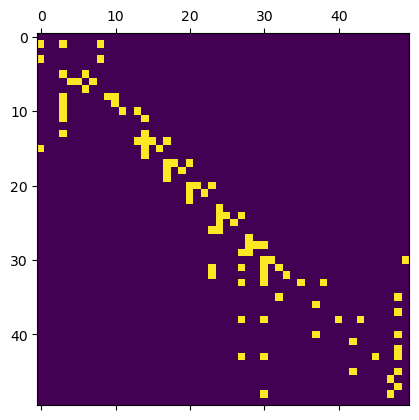

In [21]:
with open(f"adjacency/17256.npy", "rb") as f:
    adj = np.load(f)

plt.matshow(adj)

In [22]:
adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
np.unique(adj)

array([0., 1.])

In [24]:
adj.shape

(50, 50)

In [25]:
with open(f"lines/17256.npy", "rb") as f:
    lines = np.load(f)

print(lines)

[ 7  5  1  7  4 14 13  6  5  7  5  6  1  7  7 14  2  6  5  5  6  8  3  7
  7  8  2  6  4  4  8  4  6  1  3  3  2  6  1  3  3  2  6  1  3  3  3  2
  4]


In [26]:
len(lines)

49

In [36]:
with open(f"adjacency/39382.npy", "rb") as f:
    adj = np.load(f)

with open(f"lines/39382.npy", "rb") as f:
    lines = np.load(f)

print(adj.shape)
print(lines.shape)

(22, 22)
(21,)


In [37]:
with open(f"adjacency/42670.npy", "rb") as f:
    adj = np.load(f)

with open(f"lines/42670.npy", "rb") as f:
    lines = np.load(f)

print(adj.shape)
print(lines.shape)

(17, 17)
(16,)


### Clip matrices

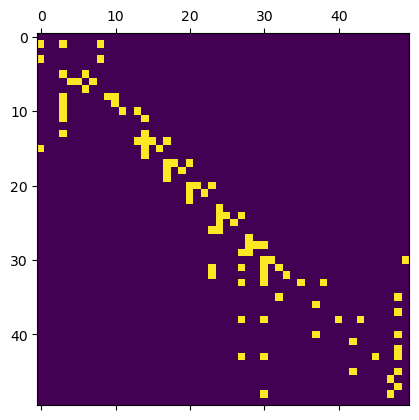

In [13]:
plt.matshow(np.clip(adj, 0, 1))

In [2]:
for name in tqdm(os.listdir("adjacency")):
    with open(f"adjacency/{name}", "rb") as f_adj:
        adj = np.load(f_adj)
    with open(f"adjacency/{name}", "wb") as f_adj:
        np.save(f_adj, np.clip(adj, 0, 1))

100%|██████████| 92974/92974 [01:01<00:00, 1507.94it/s]


In [20]:
for name in tqdm(os.listdir("adjacency")):
    with open(f"adjacency/{name}", "rb") as f_adj:
        adj = np.load(f_adj)
        assert 0 <= adj.min() and adj.max() <= 1

100%|██████████| 74371/74371 [03:16<00:00, 377.83it/s]


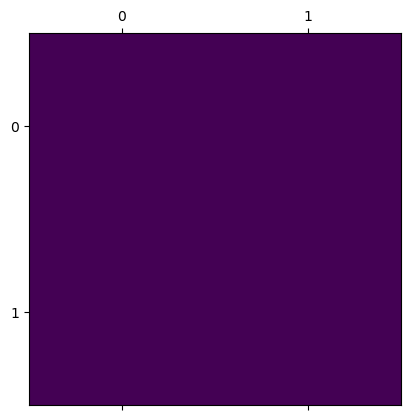

In [18]:
with open(f"adjacency/10044.npy", "rb") as f:
    adj = np.load(f)

plt.matshow(adj)

### Zero matrices

In [11]:
zero_matrices_names = []

for name in os.listdir("adjacency"):
    with open(f"adjacency/{name}", "rb") as f_adj:
        adj = np.load(f_adj)
        if adj.max() == 0:
            zero_matrices_names.append(name)

In [12]:
len(zero_matrices_names)

3040

In [13]:
len(zero_matrices_names) / len(os.listdir("adjacency"))

0.032697313227353884

In [15]:
with open('zero_matrices.txt', 'w') as f:
    for guid in zero_matrices_names:
        f.write(f"{guid[:-4]}\n")

### Absent ASG

In [3]:
present_asg = [int(name[:-4]) for name in os.listdir('adjacency')] 

In [4]:
len(present_asg)

92974

In [5]:
absent_asg = set(range(95336)) - set(present_asg)

In [6]:
absent_asg = sorted(list(absent_asg))

In [8]:
len(absent_asg)

2362

In [10]:
with open('absent_asg.txt', 'w') as f:
    for guid in absent_asg:
        f.write(f"{guid}\n")